<a href="https://colab.research.google.com/github/subha075/transport_optimization/blob/main/Transport_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
!pip install plotly_express
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly_express as px

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('TrafficIndex.csv')


In [5]:
df.head()


,Rank,City,AverageTCI,MaxTCI
0,1,Lagos,60.16,130.21
1,2,Riga,47.12,87.51
2,3,Mumbai,38.37,153.41
3,4,Tehran,38.20,110.12
4,5,London,38.16,128.50


# Data Preprocessing

In [6]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="test")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df['location'] = df['City'].apply(geocode)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)


In [7]:
df

,Rank,City,AverageTCI,MaxTCI,location,point
0,1,Lagos,60.16,130.21,"(Lagos, Lagos Island, Lagos, 100242, Nigeria, ...","(6.4550575, 3.3941795, 0.0)"
1,2,Riga,47.12,87.51,"(Rīga, Vidzeme, Latvija, (56.9493977, 24.10518...","(56.9493977, 24.1051846, 0.0)"
2,3,Mumbai,38.37,153.41,"(Mumbai, Mumbai Suburban District, Maharashtra...","(19.08157715, 72.88662753964906, 0.0)"
3,4,Tehran,38.20,110.12,"(شهر تهران, بخش مرکزی شهرستان تهران, شهرستان ت...","(35.6892523, 51.3896004, 0.0)"
4,5,London,38.16,128.50,"(London, Greater London, England, United Kingd...","(51.5073359, -0.12765, 0.0)"
...,...,...,...,...,...,...
63,64,Singapore,5.23,42.93,"(Singapore, (1.357107, 103.8194992))","(1.357107, 103.8194992, 0.0)"
64,65,Helsinki,4.67,22.43,"(Helsinki, Helsingin seutukunta, Uusimaa, Etel...","(60.1674881, 24.9427473, 0.0)"
65,66,Turin,4.29,46.20,"(Torino, Piemonte, Italia, (45.0677551, 7.6824...","(45.0677551, 7.6824892, 0.0)"
66,67,Valencia,3.40,31.97,"(València, Comarca de València, València / Val...","(39.4697065, -0.3763353, 0.0)"


In [8]:
df['latitude']=df['point'].str[0]
df['longitude']=df['point'].str[1]


In [9]:
df

,Rank,City,AverageTCI,MaxTCI,location,point,latitude,longitude
0,1,Lagos,60.16,130.21,"(Lagos, Lagos Island, Lagos, 100242, Nigeria, ...","(6.4550575, 3.3941795, 0.0)",6.455057,3.394179
1,2,Riga,47.12,87.51,"(Rīga, Vidzeme, Latvija, (56.9493977, 24.10518...","(56.9493977, 24.1051846, 0.0)",56.949398,24.105185
2,3,Mumbai,38.37,153.41,"(Mumbai, Mumbai Suburban District, Maharashtra...","(19.08157715, 72.88662753964906, 0.0)",19.081577,72.886628
3,4,Tehran,38.20,110.12,"(شهر تهران, بخش مرکزی شهرستان تهران, شهرستان ت...","(35.6892523, 51.3896004, 0.0)",35.689252,51.389600
4,5,London,38.16,128.50,"(London, Greater London, England, United Kingd...","(51.5073359, -0.12765, 0.0)",51.507336,-0.127650
...,...,...,...,...,...,...,...,...
63,64,Singapore,5.23,42.93,"(Singapore, (1.357107, 103.8194992))","(1.357107, 103.8194992, 0.0)",1.357107,103.819499
64,65,Helsinki,4.67,22.43,"(Helsinki, Helsingin seutukunta, Uusimaa, Etel...","(60.1674881, 24.9427473, 0.0)",60.167488,24.942747
65,66,Turin,4.29,46.20,"(Torino, Piemonte, Italia, (45.0677551, 7.6824...","(45.0677551, 7.6824892, 0.0)",45.067755,7.682489
66,67,Valencia,3.40,31.97,"(València, Comarca de València, València / Val...","(39.4697065, -0.3763353, 0.0)",39.469707,-0.376335


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        68 non-null     int64  
 1   City        68 non-null     object 
 2   AverageTCI  68 non-null     float64
 3   MaxTCI      68 non-null     float64
 4   location    68 non-null     object 
 5   point       68 non-null     object 
 6   latitude    68 non-null     float64
 7   longitude   68 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 4.4+ KB


# Average TCI


<Axes: ylabel='City'>

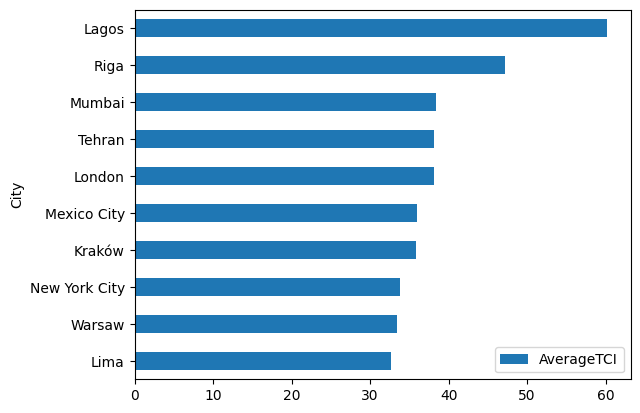

In [11]:
df.sort_values(by="AverageTCI",ascending=True).tail(10).plot.barh(x='City',y='AverageTCI')


In [12]:
fig = px.scatter_mapbox(df,lat='latitude',lon='longitude',hover_name='City',hover_data=['AverageTCI'],color='AverageTCI',
    size="AverageTCI",size_max=20,opacity=0.4,
    center={'lat':50, 'lon':9},
    zoom=1,
    height=700,
    width=1000)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(title_text="City Map for Average TCI")
fig.show()


# Max TCI

<Axes: ylabel='City'>

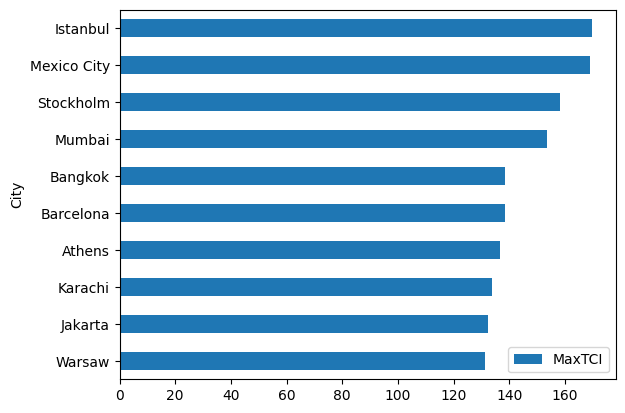

In [13]:
df.sort_values(by="MaxTCI",ascending=True).tail(10).plot.barh(x='City',y='MaxTCI')


In [14]:
fig = px.scatter_mapbox(df,lat='latitude',lon='longitude',hover_name='City',hover_data=['MaxTCI'],color='MaxTCI',
    size="MaxTCI",size_max=20,opacity=0.4,
    center={'lat':50, 'lon':9},
    zoom=1,
    height=700,
    width=1000)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(title_text="City Map for Max TCI")
fig.show()


In [15]:
df[df['City']=='Tokyo']


,Rank,City,AverageTCI,MaxTCI,location,point,latitude,longitude
49,50,Tokyo,10.03,72.61,"(東京都, 日本, (35.6840574, 139.7744912))","(35.6840574, 139.7744912, 0.0)",35.684057,139.774491
